In [1]:
# -----------------------------------------
# 
# compare results from different cation 
# exchange alpha values
# 
# -----------------------------------------
import os
import re
import glob

import cmocean.cm as cmo
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm
import matplotlib.colors as mcolors # for log-scaled colorbars
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for custom legend entries (needed for contour plot)
import numpy as np
import pandas as pd
import pickle
import xarray as xr

# --- select the data to read in
fn_in = "adsorbed_percCEC"
# ---

outdir = "/home/tykukla/SCEPTER/scepter_output/"

# --- varying alpha
# runname1 = "_cectest_alph20"
# runname2 = "_cectest_alph2"
# runname3 = "_cectest_alph0p01"

# --- varying cec
runname1 = "_cectest_cec41"
runname2 = "_cectest_cec21"
runname3 = "_cectest_cec1"

In [2]:
# --- read in profile data
ds1 = xr.open_dataset(os.path.join(outdir, runname1, "postproc_profs", f'{fn_in}.nc'))
ds2 = xr.open_dataset(os.path.join(outdir, runname2, "postproc_profs", f'{fn_in}.nc'))
ds3 = xr.open_dataset(os.path.join(outdir, runname3, "postproc_profs", f'{fn_in}.nc'))
ds2

<xarray.Dataset> Size: 68kB
Dimensions:                  (depth: 30, time: 20)
Coordinates:
  * depth                    (depth) float64 240B 0.008333 0.025 ... 0.4917
  * time                     (time) float64 160B 0.0008343 0.002501 ... 100.0
Data variables: (12/14)
    ca                       (depth, time) float64 5kB ...
    na                       (depth, time) float64 5kB ...
    k                        (depth, time) float64 5kB ...
    no3                      (depth, time) float64 5kB ...
    mg                       (depth, time) float64 5kB ...
    h                        (depth, time) float64 5kB ...
    ...                       ...
    k_coredep                (depth, time) float64 5kB ...
    no3_coredep              (depth, time) float64 5kB ...
    mg_coredep               (depth, time) float64 5kB ...
    h_coredep                (depth, time) float64 5kB ...
    base_saturation          (depth, time) float64 5kB ...
    base_saturation_coredep  (depth, time) float64 5kB ...
Attributes:
    outfile:  prof_aq(ads%cec)

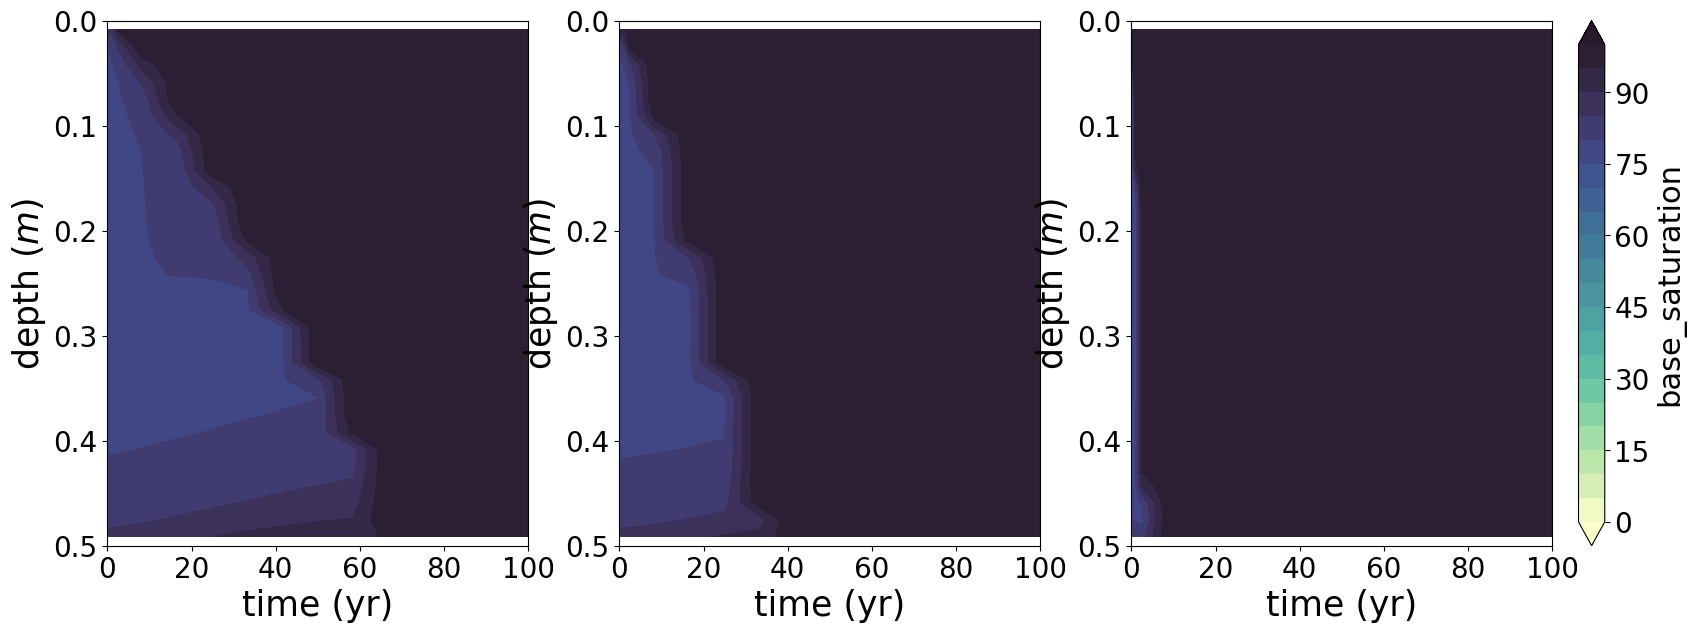

In [3]:
# --- base saturation with depth over time 
# --- PLOT --------------------
# set data conditions
var = "base_saturation"
logX = False
logY = False
contourline_threshold = 10 

# pull out the data we want 
dsp1 = ds1[var].copy()
dsp2 = ds2[var].copy()
dsp3 = ds3[var].copy()

# interpolate to fill nans (they're rare, 
# but present in a couple cases where a run didn't complete)
dsp1 = dsp1.interpolate_na(dim='time', method='linear').copy()
dsp2 = dsp2.interpolate_na(dim='time', method='linear').copy()
dsp3 = dsp3.interpolate_na(dim='time', method='linear').copy()

# *****************************
# --- plot aesthetics
# color palette
col = cmo.deep
# set fontsizes
fs_xlab = 25     # x title
fs_ylab = 25     # y title
fs_tick = 20     # ticks, bot haxes
fs_title = 30    # plot title (main)
fs_title_sub = 28 # plot title (individual panels)
fs_cbarlab = 22  # colorbar title
fs_cbartick = 20 # colorbar ticks
# color limits
cmin, cmax = 0,100
cbar_extend = "both"    # both, max, or min
# axis limits
xmin, xmax = (2 if logX else 0), 100
ymin, ymax = 0.5, 0
# *****************************

# x and y arrays
# [high alpha]
x1 = dsp1['time'].values
y1 = dsp1['depth'].values
# [mid alpha]
x2 = dsp2['time'].values
y2 = dsp2['depth'].values
# [low alpha]
x3 = dsp3['time'].values
y3 = dsp3['depth'].values


# normalize color scale to center at zero
# norm = TwoSlopeNorm(vmin=cmin, vmax=cmax,vcenter=contourline_threshold)
# norm = mcolors.LogNorm(vmin=dsp1.min(), vmax=dsp1.max())
norm = None

# --- SET UP PLOT
spec = GridSpec(ncols=3, nrows=2, hspace=0.2, width_ratios=[0.8, 0.8, 1])
plt.figure(figsize=(20,15))

# --- high alpha
ax = plt.subplot(spec[0])
contour = plt.contourf(x1,y1, dsp1, 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
contour_line = plt.contour(x1,y1,dsp1,levels=[contourline_threshold], colors='black', linewidths=2)
plt.xlabel(r"time (yr)", fontsize=fs_xlab)
plt.ylabel(r"depth $(m)$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.suptitle(f"netCDR basalt — aglime\ncf: {cf_apprate} {r'$ton\ ha^{-1}\ yr^{-1}$'}; {cf_dustrad*2} {r'$\mu m$'}", fontsize = fs_title)
# plt.title(f"\n{fertLevel_1} fertilizer use", fontsize=fs_title_sub)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# --- mid alpha
ax = plt.subplot(spec[1])
contour = plt.contourf(x2,y2, dsp2, 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
contour_line = plt.contour(x2,y2, dsp2,levels=[contourline_threshold], colors='black', linewidths=2)
plt.xlabel(r"time (yr)", fontsize=fs_xlab)
plt.ylabel(r"depth $(m)$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.title(f"\n{fertLevel_2} fertilizer use", fontsize=fs_title_sub)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# cbar = plt.colorbar(contour)
# cbar.set_label(f"{var}", fontsize=fs_cbarlab)
# cbar.ax.tick_params(labelsize=fs_cbartick)

# --- low alpha
ax = plt.subplot(spec[2])
contour = plt.contourf(x3,y3, dsp3, 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
contour_line = plt.contour(x3,y3, dsp3,levels=[contourline_threshold], colors='black', linewidths=2)
plt.xlabel(r"time (yr)", fontsize=fs_xlab)
plt.ylabel(r"depth $(m)$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.title(f"\n{fertLevel_2} fertilizer use", fontsize=fs_title_sub)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
cbar = plt.colorbar(contour)
cbar.set_label(f"{var}", fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)



## analyze flux data too

In [4]:
# --- read in flux data
fn_in_flx = "co2_flxs"

# read in
df1 = pd.read_pickle(os.path.join(outdir, runname1, "postproc_flxs", f'{fn_in_flx}.pkl'))
df2 = pd.read_pickle(os.path.join(outdir, runname2, "postproc_flxs", f'{fn_in_flx}.pkl'))
df3 = pd.read_pickle(os.path.join(outdir, runname3, "postproc_flxs", f'{fn_in_flx}.pkl'))
df2

,time,co2flx_dif,co2flx_tflx,co2flx_adv,g2,co2flx_resp,cc,co2flx_inorg,co2flx_adv_noinorg,units,flx_type,runname,var
0,0.000834,11.179760,-0.000013,0.275117,-11.162890,-11.162890,-0.291975,-0.291975,-0.016857,ton ha-1 yr-1,flx,_cectest_alph2,pco2
1,0.002501,11.711756,-0.001081,0.275117,-11.162890,-11.162890,-0.822901,-0.822901,-0.547785,ton ha-1 yr-1,flx,_cectest_alph2,pco2
2,0.008334,13.339248,-0.004141,0.275103,-11.162887,-11.162887,-2.447323,-2.447323,-2.172220,ton ha-1 yr-1,flx,_cectest_alph2,pco2
3,0.025001,15.308889,-0.012422,0.274967,-11.162867,-11.162867,-4.408567,-4.408567,-4.133599,ton ha-1 yr-1,flx,_cectest_alph2,pco2
4,0.041668,15.370186,-0.017702,0.274700,-11.162831,-11.162831,-4.464353,-4.464353,-4.189653,ton ha-1 yr-1,flx,_cectest_alph2,pco2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,83.333334,791.644964,0.038472,23.461274,-795.049232,-795.049232,-20.095477,-20.095477,3.365797,ton ha-1,int_flx,_cectest_alph2,pco2
124,87.500000,829.187533,0.039296,25.207628,-833.324775,-833.324775,-21.109682,-21.109682,4.097946,ton ha-1,int_flx,_cectest_alph2,pco2
125,91.666668,866.726049,0.041881,26.953562,-871.598918,-871.598918,-22.122575,-22.122575,4.830987,ton ha-1,int_flx,_cectest_alph2,pco2
126,95.833334,904.261865,0.044371,28.700530,-909.872111,-909.872111,-23.134655,-23.134655,5.565875,ton ha-1,int_flx,_cectest_alph2,pco2


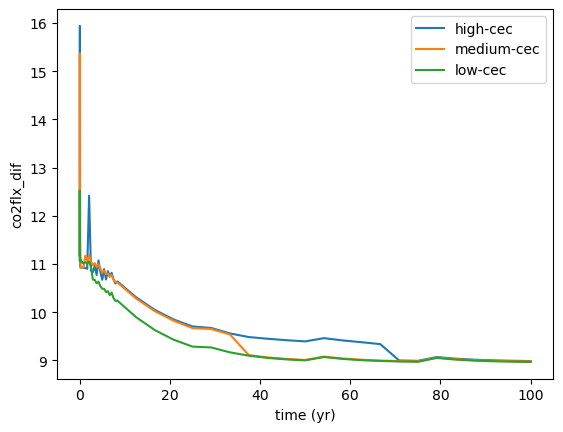

In [12]:
# --- pull out integrated flux and plot
# select var to plot 
pvar = "co2flx_adv_noinorg"
pvar = "co2flx_dif"
flxtype = "flx"

df1x = df1[df1['flx_type']==flxtype].copy()
df2x = df2[df2['flx_type']==flxtype].copy()
df3x = df3[df3['flx_type']==flxtype].copy()

plt.plot(df1x['time'], df1x[pvar], label='high-cec')
plt.plot(df2x['time'], df2x[pvar], label='medium-cec')
plt.plot(df3x['time'], df3x[pvar], label='low-cec')
plt.xlabel("time (yr)")
plt.ylabel(pvar)
# plt.ylim(-1,1)
# plt.hlines(0,0,100, colors='red', linestyle='--')
plt.legend()

In [10]:
df1x[pvar]

0     11.179839
1     11.713218
2     13.409327
3     15.738646
4     15.941015
        ...    
59     9.034630
60     9.013278
61     8.999565
62     8.990946
63     8.985555
Name: co2flx_dif, Length: 64, dtype: float64